**Attribute Information:**
1.   model - > Ford Car Brands
2.   year - >Production Year
3.   price - >Price of car in $
4.   transmission - > Automatic,Manual, Semi-Auto
5.   mileage -> Number of miles traveled
6.   fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other
7.   tax -> Annual Tax
8.   mpg - > Miles per Gallon
9.   engineSize - > Car's Engine Size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../input/ford-car-price-prediction/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
#Check if there are any null values.
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**1.Data Visualization** 

Data Types in our dataset:

Categorical features:
   1.   Nominal : model, transmission and fuelType.
   2.   Ordinal :

Numerical Features:
   1.   Continueous : price, mileage, tax, mpg and engineSize.
   2.   Discrete  : year





**1.1 Visualizing Numerical Continuous Features**


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='price'>

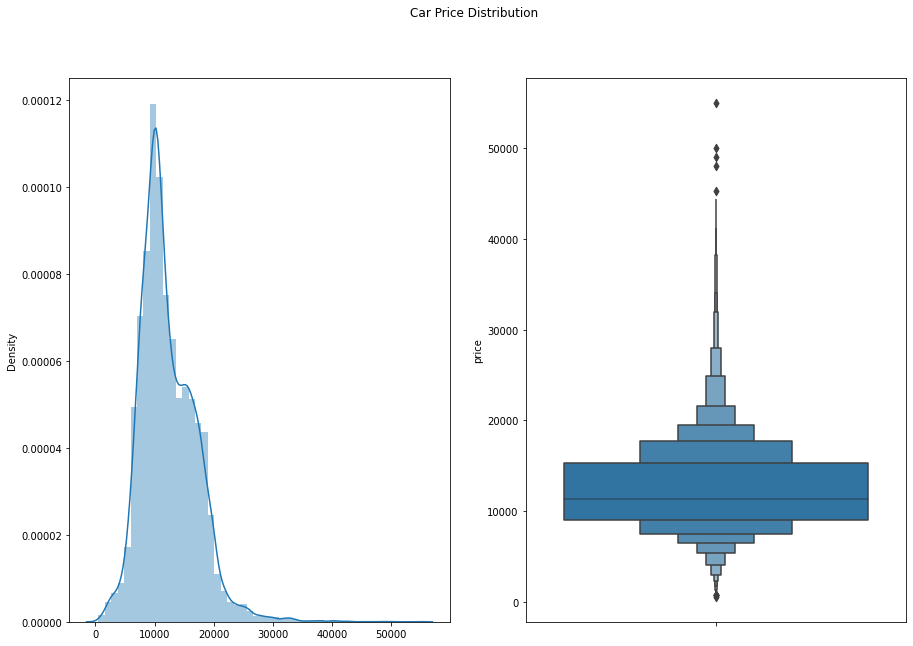

In [4]:
plt.figure(figsize=(15,10))
plt.suptitle('Car Price Distribution')

plt.subplot(1,2,1)
sns.distplot(x=df.price)

plt.subplot(1,2,2)
sns.boxenplot(y=df.price)

In [5]:
df.price.describe()

count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

1.   (75%) of our data are below 15300 and (25%) is between 15300 and 55000.
2.   Also (25%) of our data is between the min 495 and 9000.
3.   These insights show that our data has a high variance and a lot of outliers.






<AxesSubplot:xlabel='mileage', ylabel='price'>

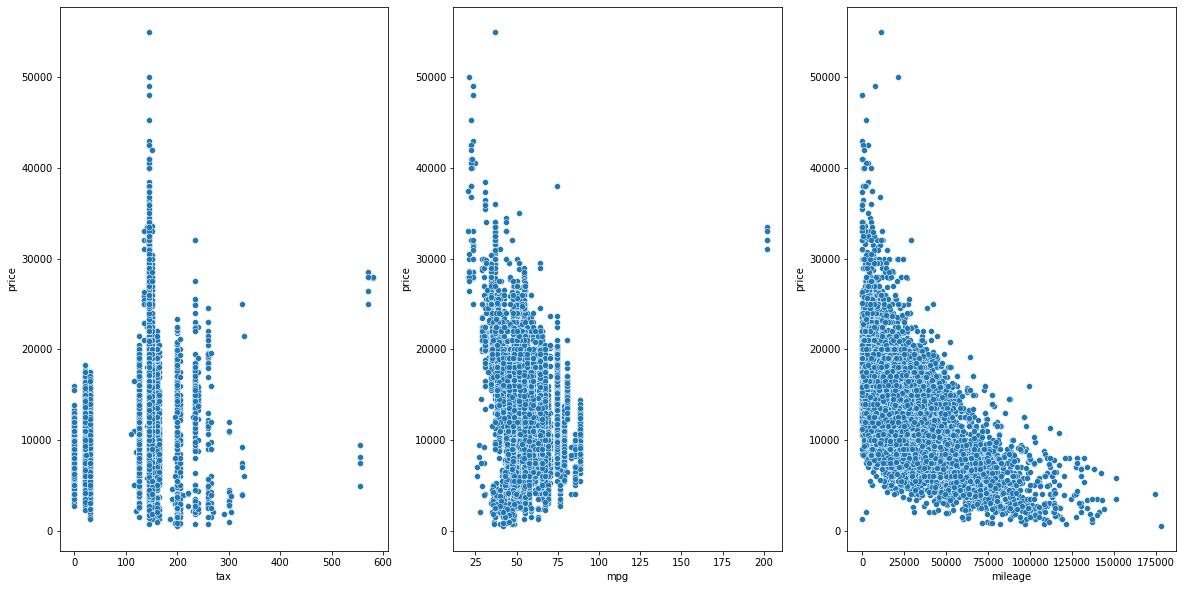

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x=df.tax,y=df.price)

plt.subplot(1,3,2)
sns.scatterplot(x=df.mpg,y=df.price)

plt.subplot(1,3,3)
sns.scatterplot(x=df.mileage,y=df.price)

1.   Mileage and mpg seem to have a negative correlation with price.
2.   Tax doesn't show any trend.

Text(0.5, 1.0, 'Spread Plot')

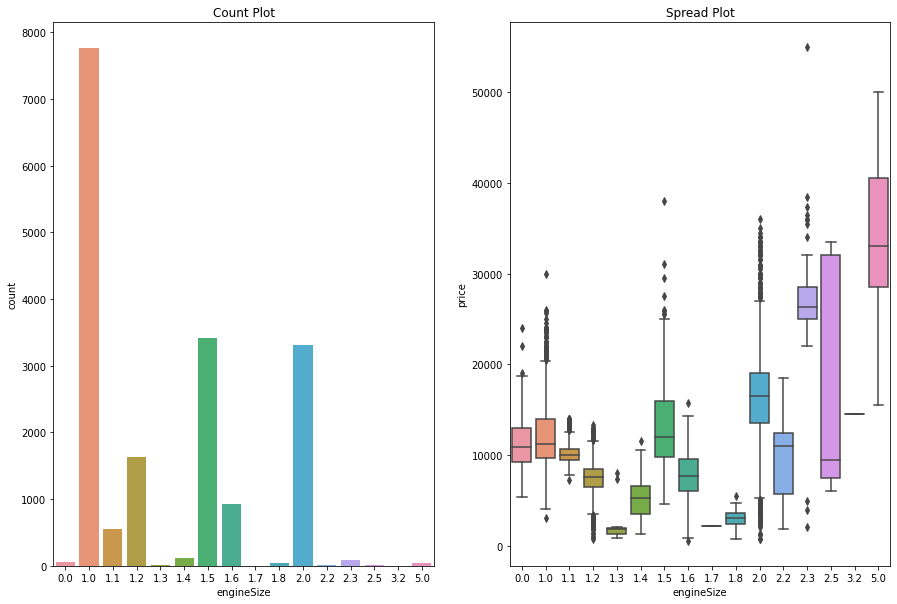

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df.engineSize)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df.engineSize,y=df.price)
plt.title('Spread Plot')



1.   The most sold cars are with engine size:1, 1.5, 2
2.   Cars with greater engine size cost more.





**1.2 Visualizing Numerical Discrete Features**

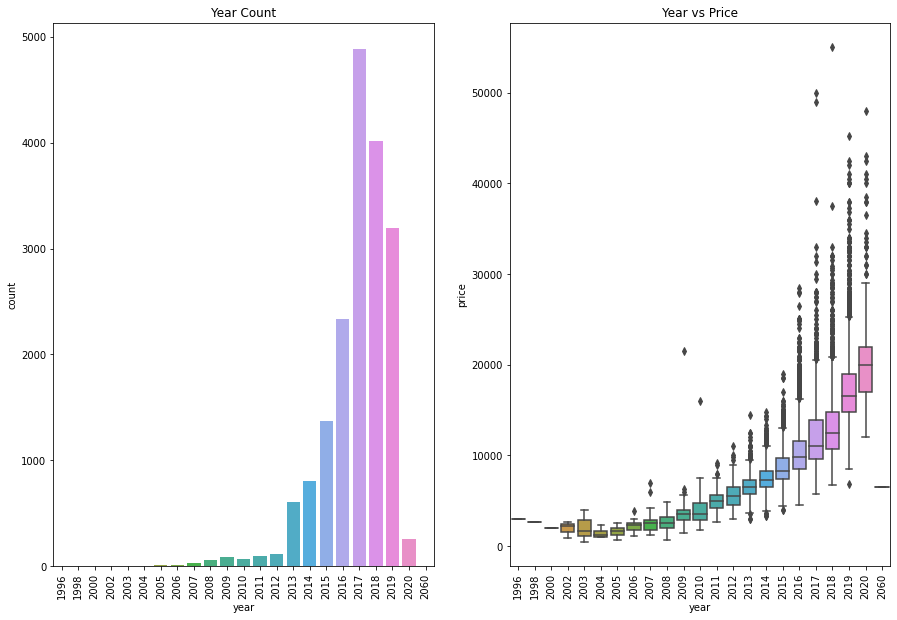

In [8]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=df.year,ax=axes[0])
axes[0].set_title('Year Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df.year,y=df.price,ax=axes[1])
axes[1].set_title('Year vs Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are between year 2013-2020.
2.   Also the cars with the highest price are the new ones.


**1.3 Visualizing Categorical Nominal Features**

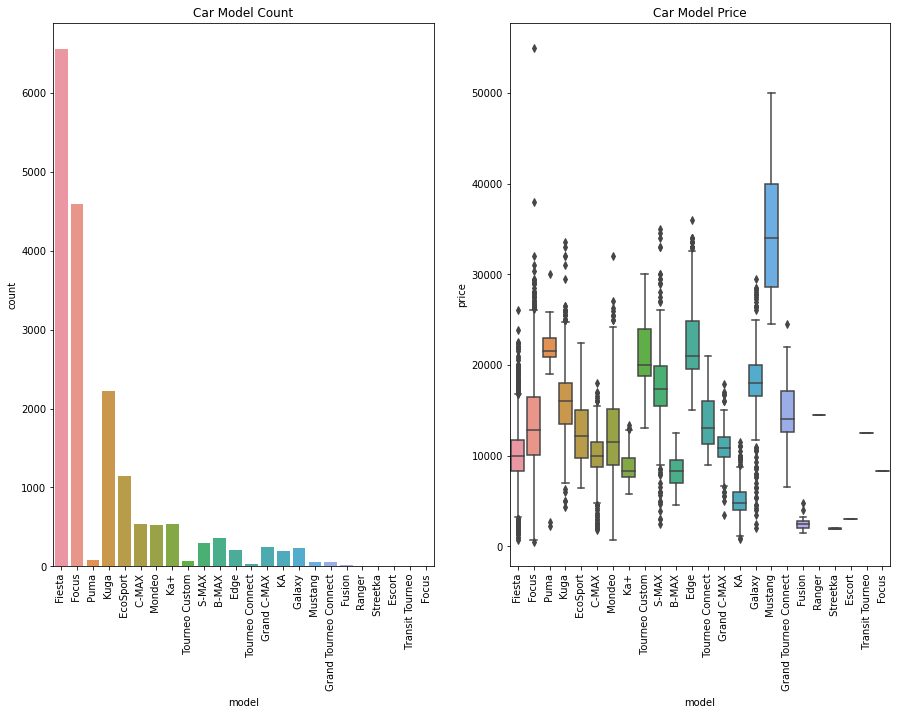

In [9]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=df.model,ax=axes[0])
axes[0].set_title('Car Model Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df.model,y=df.price,ax=axes[1])
axes[1].set_title('Car Model Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are:Fiesta,Focus and Puma which are located in the left part of the first graph.
2.   Cars with the highest price are Mustang,Edge ect.
3.   The highest the price the lower the number of cars.


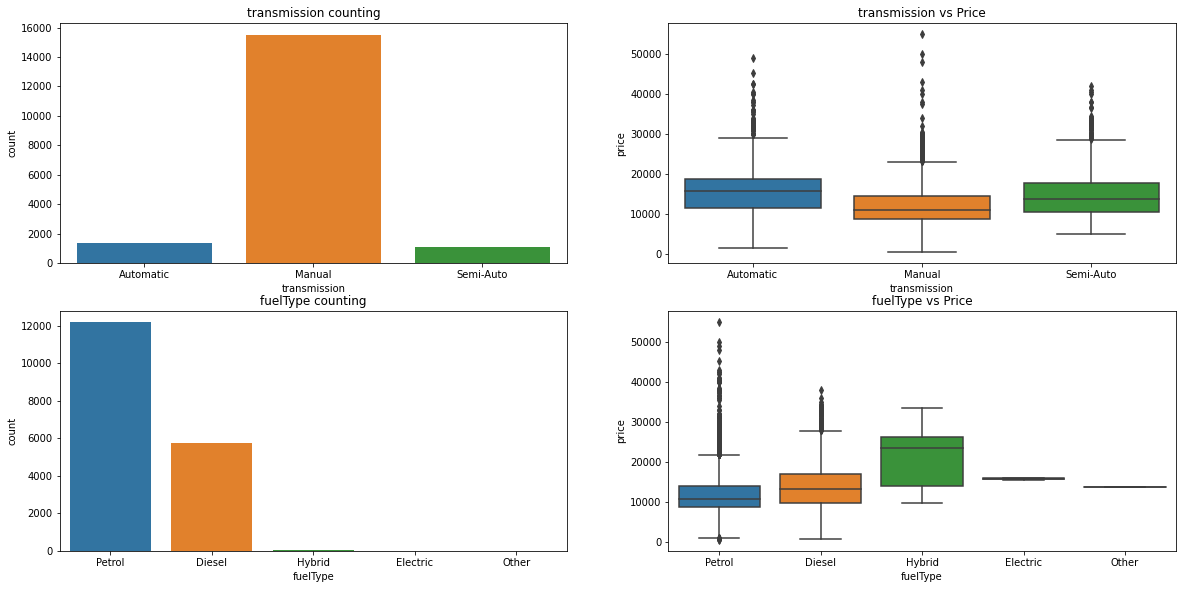

In [10]:
def my_plot(x,y,nr):
    plt.subplot(3,2,nr)
    sns.countplot(x=df[x])
    plt.title(x+' counting')

    plt.subplot(3, 2, nr+1)
    sns.boxplot(x=df[x], y=df[y])
    plt.title(x + ' vs Price')


plt.figure(figsize=(20,15))
my_plot('transmission','price',1)
my_plot('fuelType','price',3)



1.   The most sold cars are those with manual transmission.
2.   Cars with the highest price are those with Automatic and Semi-auto transmissions.




---



1.   The most used fuel is petrol followed by diesel.
2.   Cars with Hybrid fueltype have the highest price.








In [11]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


**2.Outlier removal**

In [12]:
len = ['price','mileage','tax','mpg']
for i in len:
   x = df[i].describe()
   Q1 = x[4]
   Q3 = x[6]
   IQR = Q3-Q1
   lower_bound = Q1-(1.5*IQR)
   upper_bound = Q3+(1.5*IQR)
   df = df[(df[i]>lower_bound)&(df[i]<upper_bound)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11961 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         11961 non-null  object 
 1   year          11961 non-null  int64  
 2   price         11961 non-null  int64  
 3   transmission  11961 non-null  object 
 4   mileage       11961 non-null  int64  
 5   fuelType      11961 non-null  object 
 6   tax           11961 non-null  int64  
 7   mpg           11961 non-null  float64
 8   engineSize    11961 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 934.5+ KB


**3.Feature Engineering**

In [14]:
#Lets use One-Hot Encoding to convert model ,transmission and fuelType columns.
dummies = pd.get_dummies(df.model)
dummies2 = pd.get_dummies(df.transmission)
dummies3 = pd.get_dummies(df.fuelType)

In [15]:
dummies3.head()

,Diesel,Hybrid,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
#Join new columns in one dataset
df2 = pd.concat([df,dummies,dummies2,dummies3],axis=1)
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,B-MAX,...,Puma,S-MAX,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,0,0,1,0,0,0,0,1
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,1,0,0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,0,0,1,0,0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,0,0,1,0,0,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
#Let's drop the old columns.
df2 = df2.drop(['model','transmission','fuelType'],axis=1)
df2.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Puma,S-MAX,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
#Using (df) as a default name for our dataset.
df = df2

In [19]:
#Index Reseting
df = df.reset_index(drop=True)

In [20]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
inputs = ['year','price','mileage','tax','mpg','engineSize']
df[inputs] = mms.fit_transform(df[inputs])
df.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Puma,S-MAX,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Hybrid,Petrol
0,0.863636,0.457600,0.253068,0.727273,0.558511,0.50,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.909091,0.543084,0.144161,0.727273,0.558511,0.50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.863636,0.500342,0.197702,0.727273,0.558511,0.50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.954545,0.692683,0.166019,0.636364,0.095745,0.75,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.954545,0.649940,0.023508,0.636364,0.319149,0.50,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


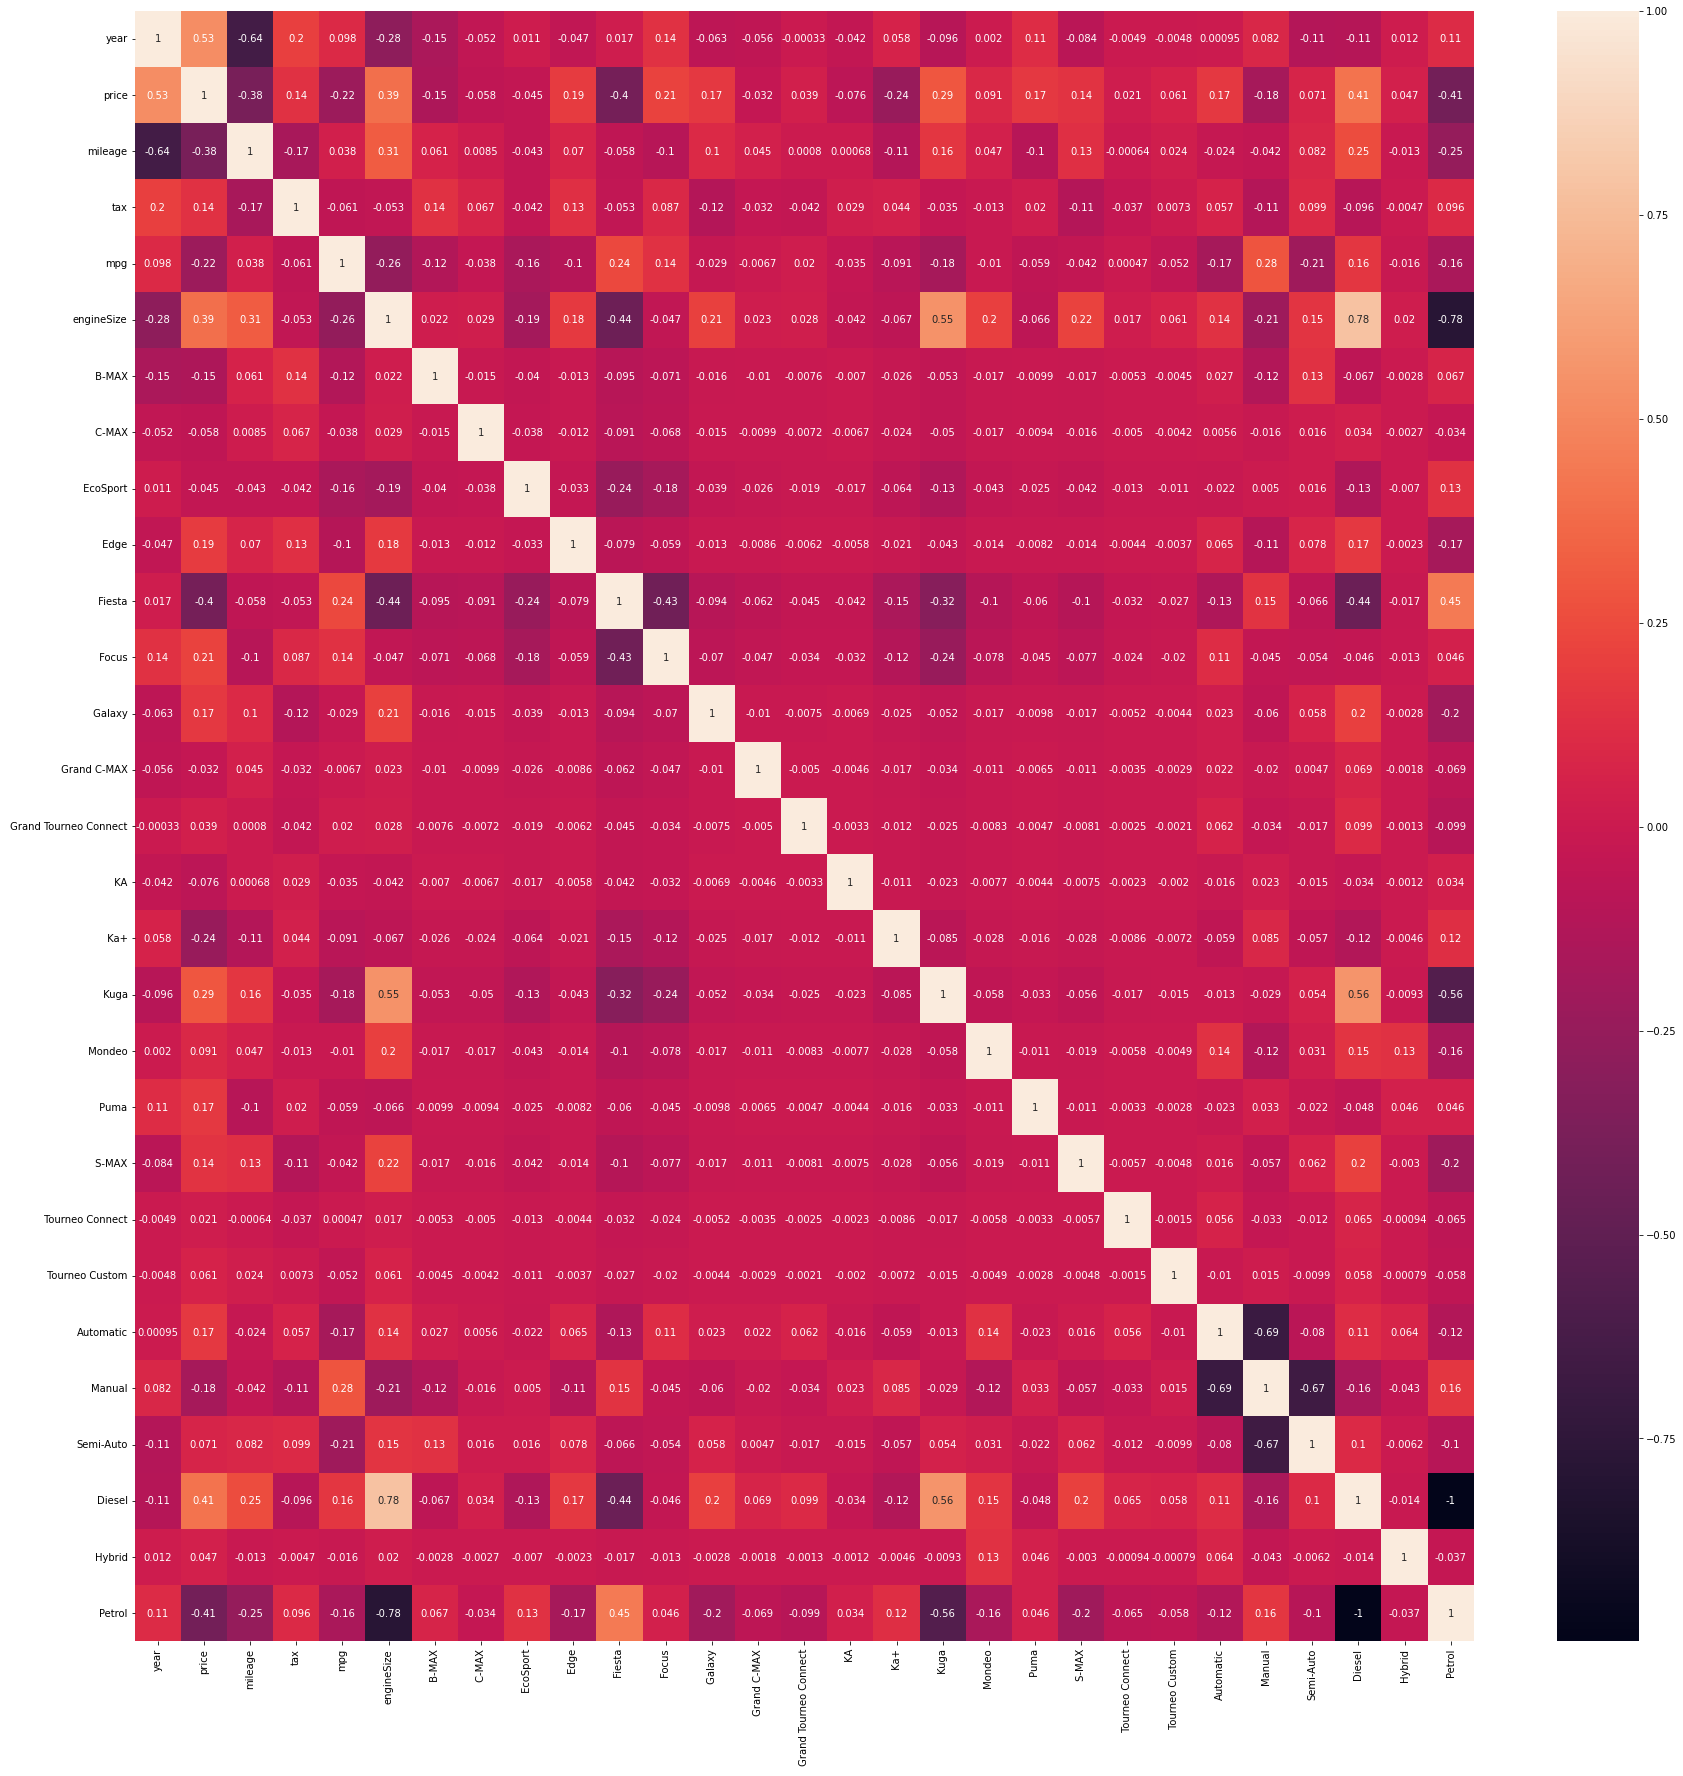

In [21]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True)
plt.show()

*   Price and Year have high positive correlation.
*   Engine Size has a medium positive correlation with price.
*   Mpg,Car Model Fiesta and fuel type petrol have a medium negative correlation with price.
*   Other features do not seem to have an impact on Price.

**4.Building the model**

In [22]:
x = df.drop('price',axis=1)
y= df.price

In [23]:
#Splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



*   Linear Regression
*   Random Forest Regressor
*   Decision Tree Regressor

















In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Training Data**

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_train(x_train,y_train):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_train,y_train),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

model_train(x_train,y_train)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.828188,0.004606,0.053164
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.985297,0.000394,0.014374
2,DecisionTreeRegressor(),0.999526,0.000013,0.000379


The second model is Random Forest Regressor.





**Testing Data**

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_test(x_test,y_test):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
        })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])


model_test(x_test,y_test)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.830510,0.004700,0.053293
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.983776,0.000450,0.015481
2,DecisionTreeRegressor(),0.999889,0.000003,0.000116


Text(0, 0.5, 'Predicted')

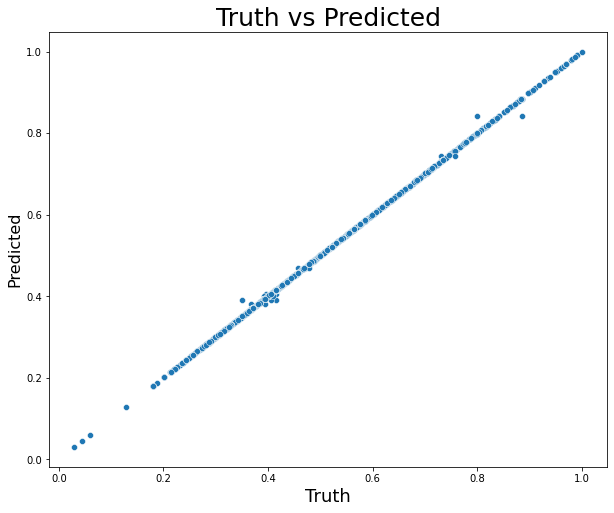

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)      
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   

**5.Conclusion**

*   The model which has performed better is Decision Tree Rregressor with accuracy 99%.
*   The model has performed well in training and testing data


